## Finding the Average Color of a Book
#### Evan Tilley
#### 6/2019

Colors play a crucial role in novels, as they often represent underlying symbolism and act as motifs, such as in <i> The Great Gatsby </i>, where colors helped reveal important ideas, emotion, and connections.

Darker colors are typically associated with morbid topics, dull emotion, or tragedy, whereas light colors convey a sense of brilliance and vibrance and are often indicative of positive moods.

Different authors often have characterstic patterns of colors in their novels which reflects their writing. For instance, perhaps one would see many darker colors appear in the works of an author who primarily writes horror, whereas an author who writes fantasy may use lighter and brighter colors.

One may even argue that, to some extent, the genre of a book can be deduced by the various colors mentioned in the book. For example, if a book uses lots of dark colors - grays, maroons, blacks - perhaps the book is a work of mystery and/or horror.

One way to analyze a book, therefore, may be to calculate the "average color" of the work by mixing the colors used in the book, based on their relative frequency, in such a way as to calculate the average color of the work.

In the following document, I will create a program that ultimately computes the average color of a book (using RGB values) and see if, using this document, it is possible to discern trends within the works of authors and/or genres.

In [0]:
import string
def neatener(filename):
  """
  Parameter: filename - a string that is a filename of a .txt file
  
  Returns:
  A list of words in the text file; the words are lowercase and punctuation is removed
  """
  file = open(filename,encoding = "ISO-8859-1") #note - if errors occur in the neatener, try using a different encoding
  text = file.read()
  file.close()
  #split into words by whitespace
  words = text.split()
  #remove punctuation from each word
  punctuation = str.maketrans('', '', string.punctuation)
  book = [i.translate(punctuation) for i in words] #list of the words in the book
  book = [i.lower() for i in book]
  return book
  
  

In [0]:
misery = neatener('misery.txt') #the book "Misery", by Stephen King

Here, we need to take a small break from coding and think about the color choices we want - how can we guarantee that we recognize as many colors as possible in a book? For instance, if we search through a text for the color "purple", we might miss out on the color "lavender", and the average color of the text would not be correctly represented.
After analyzing a variety of books, I have come up with the following list of colors, which should give us a represetative sample of colors throughout the book:

* white
* gold
* silver
* gray
* lavender
* purple
* pink
* red
* green
* blue
* scarlet
* orange
* magenta
* maroon
* aquamarine
* turqoise
* teal
* indigo
* violet
* beige
* olive
* apricot
* amber
* rose
* plum 



Note, however, that almost all of these colors explicitly describe names of colors (with the exception of a few, such as "orange" and "lavender"), but other colors such as "Lime", "Tan", "Olive", or "Apricot", though not as commonly used, refer both to colors and actual objects, so trying to incorporate them is a slighlty more difficult task, as the color "olive" could be over-represented if, for example, a scene described putting olives into a martini.

To incorporate these colors, we will use the nltk part-of-speech tagger to determine if the words are adjectives or nouns. We will only count the words if they are adjectives.

In [0]:
#list of colors
colors = ["white","gold","silver","gray","lavender","purple","pink","red","green","blue","scarlet","orange","magenta","maroon",
         "aquamarine","turqoise","teal","indigo","violet","beige", "olive", "apricot", "amber", "rose", "plum"]

#dictionary of RGB values associated with each color
#adjective - orange, gold, silver, olive, apricot, rose, amber, plum
RGBvals = {
    "white": [255,255,255], "gold" : [255,215,0], "silver": [192,192,192], "gray": [128,128,128], "lavender": [230,230,250],
    "purple": [128,0,128], "pink": [255,192,203], "red": [255, 0, 0], "green" : [0, 255, 0], "blue": [0,0,255], "scarlet": [255, 36, 0],
    "orange": [255, 165, 0], "magenta": [255,0,255], "maroon": [128, 0, 0], "aquamarine": [127, 255, 212], "turqoise": [64, 224, 208],
    "teal": [0, 128, 128], "indigo" : [75, 0, 130], "violet": [127, 0, 255], "beige": [245, 245, 220], "olive": [128,128,0],
    "apricot":[251,206,177], "amber": [255,199,0], "rose": [255,0,127], "plum": [194,147,141]
}

#let's put the colors that can also be used as nouns into a separate list

possibleNouns = ["orange", "gold", "silver", "lavender", "olive", "apricot", "amber", "rose", "plum"]


In [0]:
from collections import defaultdict
import nltk
nltk.download('averaged_perceptron_tagger')

def colorSum(textList):

  """
  Parameter: textList - a list of words representing a book
  
  Returns: A dictionary with colors as the keys and the color count as the values
  """
  
  
  colorTrack = {} #dictionary to store the frequency of each color, as well the RGB value associated with each color
  colorMentions = [] #list representing the frequency with which a color was mentioned
  colors_dict = defaultdict(int) #initialize dictionary of colors
  

  for i in range(len(textList)):  
    if textList[i] in possibleNouns: #if the color could possibly be a noun
      try:
        sampleText = textList[i-2:i+2] #sample the words around it to get context
        if('NN') in nltk.pos_tag(sampleText)[2]: #if the word is a color, increment its corresponding count in the dictionary
          colors_dict[textList[i]] += 1

      except: #if sampling the words around it causes an index out of bounds execption, just use the word itself
          sampleText = textList[i]

          if('NN') in nltk.pos_tag(sampleText)[2]: #if the word is a color, increment its corresponding count in the dictionary
            colors_dict[textList[i]] += 1
          
    elif textList[i] in colors:
      if (textList[i]) == 'grey': #account for British spelling
        colors_dict['gray'] += 1
      else:
        colors_dict[textList[i]] += 1
      
  for i in RGBvals:
    colorMentions.append(colors_dict[i]) #make list with ints representing number of mentions of colors in textList
  for i in range(len(colors)):
      colorTrack[colors[i]] = [colorMentions[i],[RGBvals[colors[i]]]]
  return colorTrack

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
colorCount = colorSum(misery)
colorCount

{'amber': [0, [[255, 199, 0]]],
 'apricot': [0, [[251, 206, 177]]],
 'aquamarine': [0, [[127, 255, 212]]],
 'beige': [0, [[245, 245, 220]]],
 'blue': [27, [[0, 0, 255]]],
 'gold': [5, [[255, 215, 0]]],
 'gray': [18, [[128, 128, 128]]],
 'green': [12, [[0, 255, 0]]],
 'indigo': [0, [[75, 0, 130]]],
 'lavender': [0, [[230, 230, 250]]],
 'magenta': [0, [[255, 0, 255]]],
 'maroon': [1, [[128, 0, 0]]],
 'olive': [0, [[128, 128, 0]]],
 'orange': [3, [[255, 165, 0]]],
 'pink': [7, [[255, 192, 203]]],
 'plum': [0, [[194, 147, 141]]],
 'purple': [7, [[128, 0, 128]]],
 'red': [28, [[255, 0, 0]]],
 'rose': [0, [[255, 0, 127]]],
 'scarlet': [0, [[255, 36, 0]]],
 'silver': [4, [[192, 192, 192]]],
 'teal': [0, [[0, 128, 128]]],
 'turqoise': [0, [[64, 224, 208]]],
 'violet': [0, [[127, 0, 255]]],
 'white': [58, [[255, 255, 255]]]}

In [0]:
import numpy as np
import copy
def convertToRGB(colorDict):
  """
  Parameter: colorDict - a dictionary that has strings representing colors as the keys, and the color count as the values
  
  Returns: a dictionary that now takes into account the relative freqeuncy of colors to calculate the RGB value
  """
  colorDictionary = copy.deepcopy(colorDict) #make a deep copy to avoid problems with memory references
  for i in range(len(colorDictionary)):
    #weight the rgb values according to frequency
    colorDictionary[colors[i]][1] = np.array(colorDictionary[colors[i]][1]) * (colorDictionary[colors[i]][0]) #numpize array so can vectorize multiplication
    colorDictionary[colors[i]][1] = colorDictionary[colors[i]][1].tolist() #remove numpy array
  return colorDictionary #return final result

In [0]:
finalRGB = convertToRGB(colorCount)
finalRGB



{'amber': [0, [[0, 0, 0]]],
 'apricot': [0, [[0, 0, 0]]],
 'aquamarine': [0, [[0, 0, 0]]],
 'beige': [0, [[0, 0, 0]]],
 'blue': [27, [[0, 0, 6885]]],
 'gold': [5, [[1275, 1075, 0]]],
 'gray': [18, [[2304, 2304, 2304]]],
 'green': [12, [[0, 3060, 0]]],
 'indigo': [0, [[0, 0, 0]]],
 'lavender': [0, [[0, 0, 0]]],
 'magenta': [0, [[0, 0, 0]]],
 'maroon': [1, [[128, 0, 0]]],
 'olive': [0, [[0, 0, 0]]],
 'orange': [3, [[765, 495, 0]]],
 'pink': [7, [[1785, 1344, 1421]]],
 'plum': [0, [[0, 0, 0]]],
 'purple': [7, [[896, 0, 896]]],
 'red': [28, [[7140, 0, 0]]],
 'rose': [0, [[0, 0, 0]]],
 'scarlet': [0, [[0, 0, 0]]],
 'silver': [4, [[768, 768, 768]]],
 'teal': [0, [[0, 0, 0]]],
 'turqoise': [0, [[0, 0, 0]]],
 'violet': [0, [[0, 0, 0]]],
 'white': [58, [[14790, 14790, 14790]]]}

In [0]:
def average(colorDict):
  """
  Parameter: colorDict - a dictionary with colors as the keys, and the frequency of the occurence of the color as well as the RGB value
  of the color as the values
  
  Returns: The average RGB value of the dictionary
  """
  RGB = [] #list of RGB values

  colorSum = 0 #total number of instances of color in the book
  R = 0 #red
  G = 0 #green
  B = 0 #blue
  
  for i in range(len(colorDict)):
    colorSum+=colorDict[colors[i]][0] #find total number of instances of color in the book
    
  for i in range(len(colorDict)):
    R += colorDict[colors[i]][1][0][0] #calculate R
    G += colorDict[colors[i]][1][0][1] #calculate G
    B += colorDict[colors[i]][1][0][2] #calculate B
  
  #take into account total number of mentions of color in order to calculate the RGB value
  RGB.append(R/colorSum)
  RGB.append(G/colorSum)
  RGB.append(B/colorSum)
  
  return RGB
    

In [0]:
miseryColor = average(finalRGB)
miseryColor

[175.59411764705882, 140.21176470588236, 159.2]

In [0]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def showColor(RGB, title):
    """Parameter:
    RGB - a list of 3 values, representing RGB values
    title - a string, representing a book title
    Returns:
    A rectangle the same color as the corresponding RGB value"""
    
    fig, ax = plt.subplots(1)   #make a new figure 
    ax.set_xlim([0,2]) #set xlims
    ax.set_ylim([0,2]) #set ylims
    RGB = [i/255 for i in RGB] #convert RGB into matplotlib format
    ax.add_patch(Rectangle((0,0),2,2,color=RGB)) #plot a rectangle with the appropriate color
    ax.set_title("Average Color of " + title, fontsize = 20)
    fig.show()

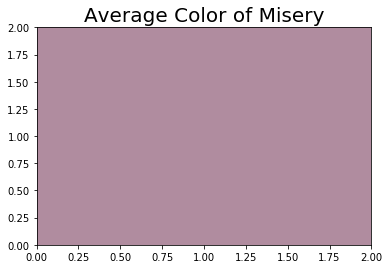

In [0]:
showColor(miseryColor, "Misery")

## Analysis of Various Books and Authors

### Stephen King

Notice how King's novel, <i> Misery </i> has an average color that is a dull purplish/red color. This color is very fitting to the novel, as <i> Misery </i> is a novel pervaded with a dull sense of hopeless and fear throughout. In addition, <i> Misery </i> is a very violent novel, so perhaps the red undertones indicate this.

In general, it seems plausible that the average Stephen King work will have a similar color sceheme - a dull, dark, perhaps reddish, color. Let's test this claim, however, by looking at some of King's other novels.

In [0]:
shining = neatener('The Shining.txt') #The Shining

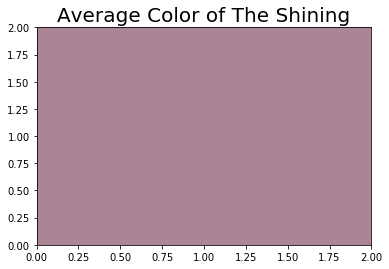

In [0]:
showColor(average(convertToRGB(colorSum(shining))), 'The Shining') #abbreviated way to plot the average color

### What What?!
This can't be right! The colors look almost exactly the same!

Let's check to make sure there isn't any error in the code by printing out the resulting RGB value for each value to make sure they're not identical!


In [0]:
print("RGB values for Misery")
print(average(convertToRGB(colorSum(misery))))
print("RGB values for The Shining")
print(average(convertToRGB(colorSum(shining))))

RGB values for Misery
[175.59411764705882, 140.21176470588236, 159.2]
RGB values for The Shining
[170.76640419947506, 132.56430446194227, 149.12073490813648]


Nope! They're not identical, so there's not anything wrong with our code!
Maybe it's just a coincidence with these two books? Let's test another Stephen King book, <i> The Stand </i>

In [0]:
stand = neatener('The Stand.txt')

RGB for The Stand
[169.59843400447429, 138.662192393736, 146.04697986577182]


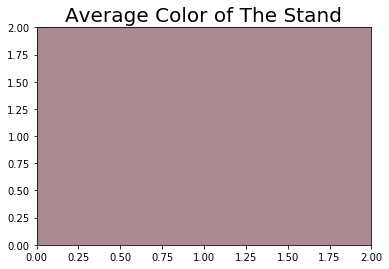

In [0]:
showColor(average(convertToRGB(colorSum(stand))), 'The Stand')
print("RGB for The Stand")
print(average(convertToRGB(colorSum(stand))))

Again, the pattern holds!
Notice how close the average color of all the Stephen King books are! One might even argue that, given the average color of a book, one could perhaps identify it is a Stephen King book! This color is very distinctive, a dull maroon color, that reflects, to a large extent, many of the violent, perverse, and downright creepy actions that take place in his books.


Let's look at some examples of the usage of colors in King's books:

In <i> Misery </i> there is a great deal of this dark maroon color throughout the book, as this color seems to symbolize the evil aura surounding Annie Wilkes, the antagonist. Consider, for example, the following sentence, which describes the parlor of Wilkes house: "Dark red predominated, as if someone had spilled a great deal of venous blood in here." This sentence not only gives off vivid imagery but also foreshadows the violence to come in Wilke's house.

Vivid sentenes like this are scattered throughout King's book, which results in the dark red maroon color. Another example is the following sentence, "In [Annie's] other hand she had a Victor rat—trap. There was a rat in it, too — a large one with mottled gray-brown fur. The trap had broken the rat's back. Its rear feet hung over the sides of the trap's board, twitching randomly. There were beads of blood in its whiskers. " This sentence encapsulates the mood of <i> Misery </i> as there it not only involves death, but also has a very dull, dark, violent mood. 

The colors in both of these sentence contribute to the overall average dark maroon color of <i> Misery </i>.

Let's also look for examples of the maroon color in <i> The Stand </i>.  <i> The Stand </i> describes the resulting world after a plague decimates most of the population, and is therefore very dreary, bloody, and depressing. Consider, for instance, the following passage, which describes the first person infected with the plague: "It wasn't the man who had fallen out (Hap had caught him neatly before he could thump to the pavement) but the smell that was issuing from the car, a sick stench compounded of blood, fecal matter, vomit, and human decay. It was a ghastly rich sick-dead smell." This sentence is brutally vivid and provides readers with clear imagery. The sentence combines the colors of red, brown, black, and gray, in such a way that resembles the overall average color of the book.

In addition, the maroon average color can likely be attributed to the fact that the plague causes its victim's necks to swell up and become purple and black. For example, consider the following disturbing passage, describing plague victims:

"Their necks had swelled up like inner tubes and the flesh there was a purple-black color, like a bruise. The flesh was puffed up under their eyes, too. They looked, Vic later said, like those baseball players who put lampblack under their eyes to cut the glare. Their eyes bulged sightlessly. The woman was holding the child's hand. Thick mucus had run from their noses and was now clotted there. Flies buzzed around them; lighting in the
mucus, crawling in and out of their open mouths."

This passage is very morbid and graphic, and very well fits with the average color of the book, due to the sick combination of purple, black, yellow, and red that the passage describes.




But wait! Let's check to make sure every single book doesn't have this color as a result of some other issue!

### Mary Shelley

Let's do the same analysis for Mary Shelley's novel, <i> Frankenstien </i>

RGB for Frankenstein
[125.63636363636364, 146.78787878787878, 185.87878787878788]


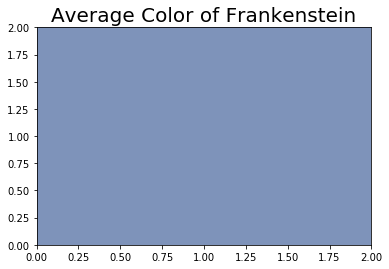

In [0]:
frankenstein = neatener('Frankenstein.txt')
showColor(average(convertToRGB(colorSum(frankenstein))), 'Frankenstein')
print("RGB for Frankenstein")
print(average(convertToRGB(colorSum(frankenstein))))

Notice how the average color of <i> Frankenstein </i> is less dark and more of a neutral blue color. Perhaps this is because <i> Frankenstein </i> is not so much outright horror, but rather a mix of emtions within one book.

Let's try an analysis of one of Shelley's other novels, <i> The Last Man </i>

RGB for The Last Man
[145.46491228070175, 154.32456140350877, 144.35087719298247]


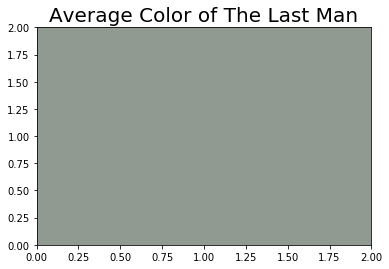

In [0]:
lastman = neatener('The Last Man.txt')
showColor(average(convertToRGB(colorSum(lastman))), 'The Last Man')
print("RGB for The Last Man")
print(average(convertToRGB(colorSum(lastman))))

## Fantasy

Let's try to analyze a few fantasy books! One would think that the average color of a fantasy book would tend to be brighter than horror novels because the general mood of fantasy books are generally lighter and more uplifting.
However, some fantasy books are generally darker than others, so perhaps the average color will vary, depending on the specific plot of a fantasy book.

Let's analyze <i> Harry Potter and the Sorcerer's Stone </i> by J.K. Rowling.

RGB for The Sorcerer's Stone
[178.4, 151.76, 111.47]


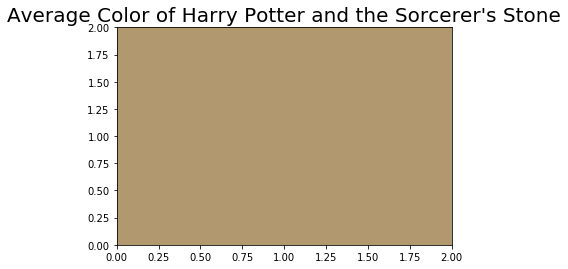

In [0]:
sorcerers_stone = neatener('sorcerersstone.txt')
showColor(average(convertToRGB(colorSum(sorcerers_stone))), "Harry Potter and the Sorcerer's Stone")
print("RGB for The Sorcerer's Stone")
print(average(convertToRGB(colorSum(sorcerers_stone))))

It is reasonable that the average color of <i> Harry Potter and the Sorcerer's Stone </i> is relatively dark/dull as the book is less of a colorful fantasy full of kingdoms and castles and more of a creepy fantasy, as Harry Potter discovers the great evils that lie within Hogwarts.

Let's analyze a more upbeat fantasy, such as <i> The Hobbit </i> by J.R.R. Tolkein.

RGB for The Hobbit
[184.2396694214876, 164.5909090909091, 85.1900826446281]


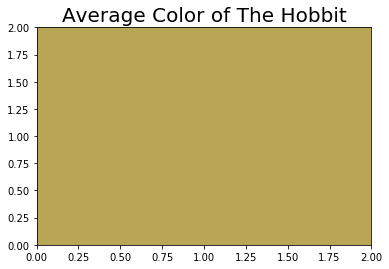

In [0]:
hobbit = neatener('hobbit.txt')
showColor(average(convertToRGB(colorSum(hobbit))), 'The Hobbit')
print("RGB for The Hobbit")
print(average(convertToRGB(colorSum(hobbit))))

Notice how the average color of <i> The Hobbit </i> is a bit lighter than the average color of <i> Harry Potter and the Sorcerer's Stone </i>. This most likely reflects the fact that <i> The Hobbit </i> is a more light-hearted fantasy novel.

## Analysis on a larger scale

The examples above were simply a few basic analyses of books, but it would be more usesful to analyze books on a larger scale, such as analayzing the average color of many books in the horror genre. We can do this using corpus-db in parallel with the Project Gutenberg database.

In [0]:
#import necessary modules
import requests
import json
import pandas as pd

In [0]:
baseURL = "http://corpus-db.org"
genres = requests.get(baseURL + "/api/subjects").text
genres = json.loads(genres) #load all genres from corpus db

Let's find the horror genres by looping through all the genres:

In [4]:
for i in genres:
  if ('horror') in i[0] or ('Horror') in i[0]:
      print(i)

['Horror tales', 81]
['Horror tales, English', 17]
['Horror tales, American', 15]
['Horror tales, French', 2]
['Horror films', 1]
['Horror tales -- Appreciation -- Fiction', 1]
['Horror tales, American -- Translations into Spanish', 1]
['Horror tales, English -- History and criticism', 1]


We can use all the books in the 'Horror tales, English' genre to analyze a variety of different horror books, so we can find look at the average color of 17 different books.

In [0]:
horror = json.loads(requests.get(baseURL + "/api/subject/Horror tales, English").text) #all the horror novels

We can make a table of all the horror books we will be analyzing by using pandas, as follows:

In [6]:
horrorSample = pd.DataFrame(
    [(item['id'], item['author'], item['title']) 
     for item in horror])
horrorSample

,0,1,2
0,537.0,"Doyle, Arthur Conan",Tales of Terror and Mystery
1,2548.0,"Gaskell, Elizabeth Cleghorn",The Poor Clare
2,2549.0,"Gaskell, Elizabeth Cleghorn",The Doom of the Griffiths
3,4046.0,"Blackwood, Algernon",The Garden of Survival
4,8486.0,"James, M. R. (Montague Rhodes)",Ghost Stories of an Antiquary
5,9629.0,"James, M. R. (Montague Rhodes)",Ghost Stories of an Antiquary Part 2: More Gho...
6,10624.0,"Blackwood, Algernon",Three John Silence Stories
7,10659.0,"Blackwood, Algernon",Three More John Silence Stories
8,10832.0,"Hodgson, William Hope","Carnacki, the Ghost Finder"
9,12124.0,"Jacobs, W. W. (William Wymark)","The Well: The Lady of the Barge and Others, Pa..."


We want to extract the text from each novel, and we can do so with the following function:

In [0]:
def getFulltext(bookID): 
    return json.loads(requests.get(baseURL + '/api/id/' + bookID + '/fulltext').text)

In [0]:
horrorFulltexts = [getFulltext(bookID) for bookID in horrorSample[0]] 
horrorPlainText = [text[0]['text'] for text in horrorFulltexts if text!= []]
#horrorFulltexts - notice how some of the items are empty lists - this needs to be worked on.

Now we have a list of texts - the only other thing we need is a list of corresponding titles - the code below extracts the titles from the texts

In [0]:
titles = horrorSample.loc[0:len(horrorSample),2].values.tolist()
print(titles)

['Tales of Terror and Mystery', 'The Poor Clare', 'The Doom of the Griffiths', 'The Garden of Survival', 'Ghost Stories of an Antiquary', 'Ghost Stories of an Antiquary Part 2: More Ghost Stories', 'Three John Silence Stories', 'Three More John Silence Stories', 'Carnacki, the Ghost Finder', 'The Well: The Lady of the Barge and Others, Part 4.', 'The Tale of Terror: A Study of the Gothic Romance', 'Four Weird Tales', 'A Thin Ghost and Others', 'The House of Souls', 'Studies in love and in terror', 'The Three Impostors; or, The Transmutations', 'The Watcher, and other weird stories', 'Day and Night Stories']


Now we can create a function that uses the earlier defined functions to find the average color of each book:

In [0]:
def massAnalysis(texts):
  """
  Parameter: texts - a list of strings; each string represents a novel
  
  Returns:
  The average color of each string in the list texts
  """
  for i in range(len(texts)):
    print(i)
    showColor(average(convertToRGB(colorSum(clean(texts[i])))), titles[i])


In [0]:

def clean(text):
  """
  Parameter: text - a string that represents a novel
  
  Returns:
  A list of words in the novel; the words are lowercase and punctuation is removed
  """
  
  #split into words by whitespace
  words = text.split()
  #remove punctuation from each word
  punctuation = str.maketrans('', '', string.punctuation)
  book = [i.translate(punctuation) for i in words] #list of the words in the book
  book = [i.lower() for i in book]
  return book

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


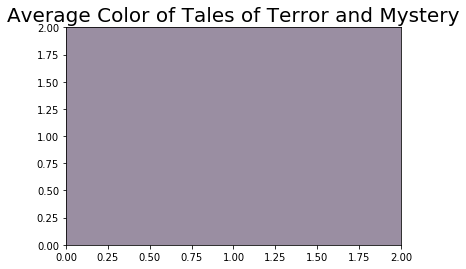

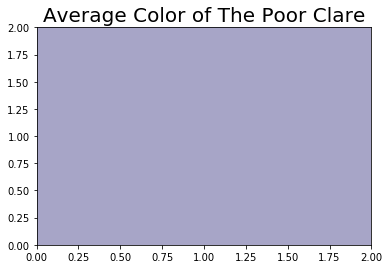

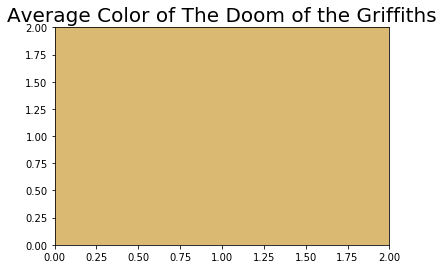

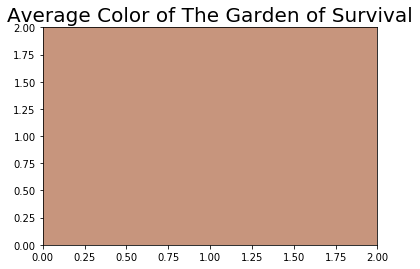

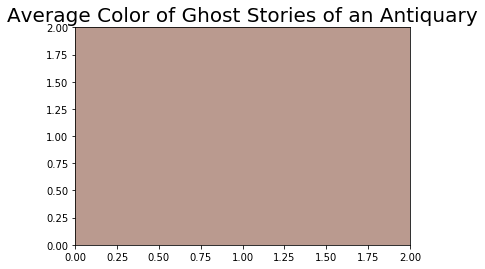

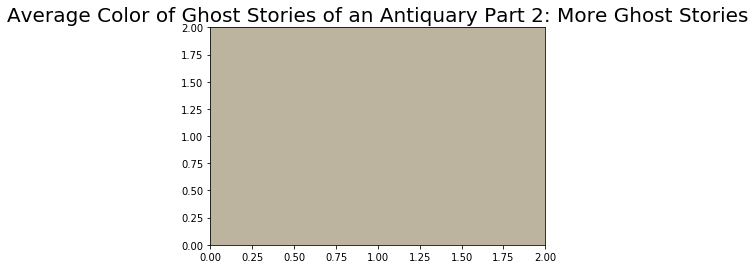

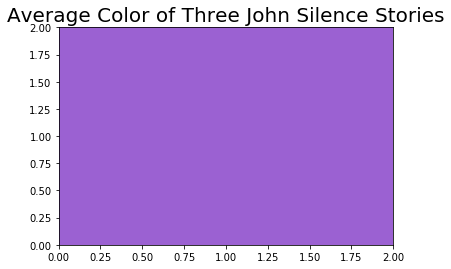

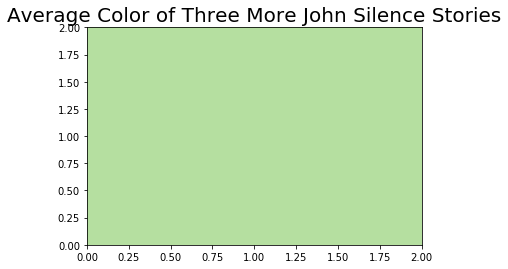

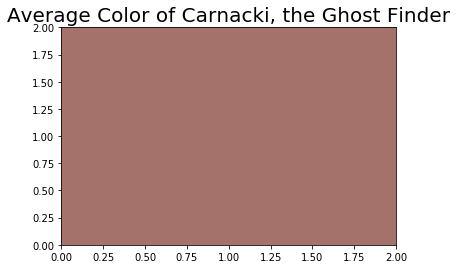

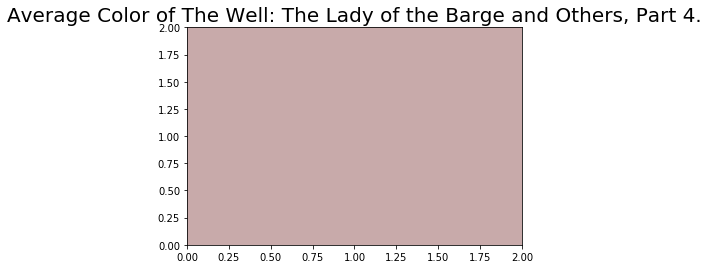

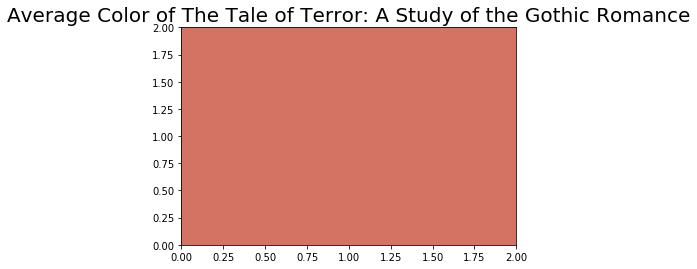

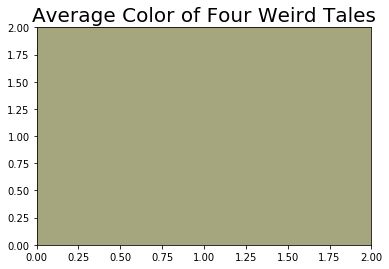

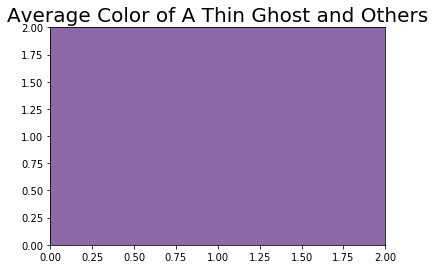

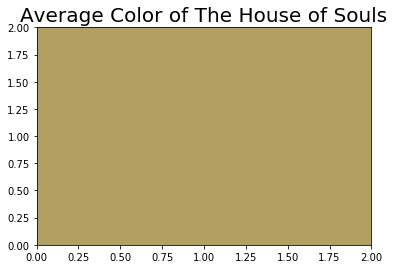

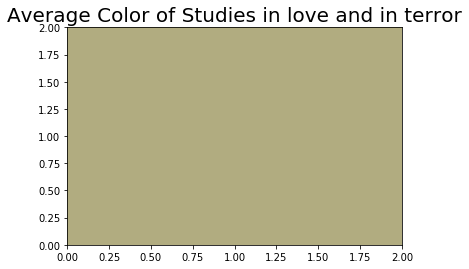

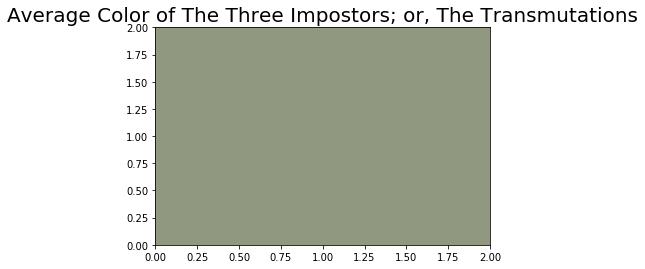

In [0]:
massAnalysis(horrorPlainText)

The examples above were simply a few basic analyses of books. This program is useful because it allows a large number of books to be analyzed, and perhaps interpreted, on the basis of color, in a very short amount of time. I would highly encourage making a prediction on what the average color of a book is, and then testing out the prediction for yourself by running this program!